In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
    sys.path.append(module_path + "/src/simulations_v2/params/spring_2021_calibration/")


In [2]:
from spring_calibration_utils import SpringCalibration

spring_calib = SpringCalibration(0.6)

In [3]:

import multiprocessing as mp
import gc
from joblib import Parallel, delayed
import multiprocessing

inputs = np.arange(0.2,.6,.01)
def processInput(i):
    gc.collect()
    spring_calib = SpringCalibration(i)
    return spring_calib.run_and_score_trajectories(100)

num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)

In [11]:
results

[(61642.7696, 5195.5608),
 (56323.7668, 4844.1163),
 (48295.78079999999, 4342.858799999999),
 (39374.41600000001, 3560.6124000000004),
 (38004.166000000005, 3726.6469000000006),
 (28413.5572, 2961.2389000000007),
 (33012.6896, 4447.2384),
 (49175.6348, 6557.056099999999),
 (312821.7524, 30507.671100000007),
 (3294574.6152, 366414.507),
 (14124549.031600004, 1596953.1157000002),
 (44835027.71, 5143854.4033),
 (53639745.007599995, 5850816.8941),
 (66739255.653600015, 7449002.018599999)]

In [5]:
len(results)

40

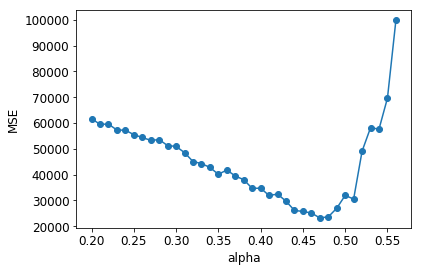

In [8]:
import matplotlib.pyplot as plt
length=len(results)-3
plt.plot(inputs[0:length], [r[0] for r in results[0:length]], marker='o')
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

In [3]:
cum_score, avg_per_group_score = spring_calib.run_and_score_trajectories(3)

In [4]:
cum_score

24724.197333333334

In [5]:
avg_per_group_score

6327.424

In [4]:
spring_calib.cumulative_actual_counts

,cum_case_count
0,3
1,4
2,5
3,5
4,7
...,...
120,485
121,485
122,485
123,485


In [8]:
spring_calib.score_trajectory(cum_df, dfs_by_group)

(2957022.0, 485816.0)

In [6]:
actual_df = spring_calib.cumulative_actual_counts

In [7]:
cum_df['QI'] - actual_df['cum_case_count']

0       -3
1       16
2       50
3       83
4       96
      ... 
122    -11
123      2
124     13
125    NaN
126    NaN
Length: 127, dtype: object

In [11]:
actual_counts_by_group[2]

,day,cum_case_count
0,0,3
1,1,4
2,2,4
3,3,4
4,4,5
...,...,...
120,120,192
121,121,192
122,122,192
123,123,192


In [8]:
spring_calib = SpringCalibration(0.9)
cum_df, sim_dfs_by_group = spring_calib.run_new_trajectory()

In [4]:
sim_dfs_by_group[0]

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,3314,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,0,0
1,3304,0,2,0,4,2,0,1,1,0,...,0,0,0,3,3,0,3,2.92621,0.0540474,0.0197401
2,3283,8,6,0,7,2,2,0,0,0,...,0,0,0,5,6,0,5,5.85242,0.108095,0.0394803
3,3266,11,9,0,5,5,2,1,0,0,...,0,0,0,7,13,0,7,12.6803,0.234206,0.0855406
4,3250,13,19,0,8,5,5,0,0,1,...,0,0,0,11,20,0,11,19.5081,0.360316,0.131601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,486,43,2776,18,1,1,1,0,0,0,...,0,0,0,1365,1430,3,1365,1394.83,25.7626,9.40947
122,482,42,2776,18,4,1,0,1,0,0,...,0,0,0,1365,1430,3,1365,1394.83,25.7626,9.40947
123,485,35,2776,18,1,2,1,1,0,0,...,0,0,0,1366,1431,3,1366,1395.8,25.7806,9.41605
124,483,32,2778,18,4,2,3,0,0,0,...,0,0,0,1366,1432,3,1366,1396.78,25.7986,9.42263


In [12]:
spring_calib.multigroup_sim.sims[0].sim_df

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,3314,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3309,0,6,0,0,0,2,0,1,0,...,0,0,0,3,4,0,3,3.90162,0.0720632,0.0263202
2,3297,12,13,1,0,0,0,0,0,0,...,0,0,0,8,10,0,8,9.75404,0.180158,0.0658005
3,3287,18,17,1,1,1,1,0,0,0,...,0,0,0,9,11,0,9,10.7294,0.198174,0.0723805
4,3283,18,17,2,4,0,0,0,0,0,...,0,0,0,11,11,0,11,10.7294,0.198174,0.0723805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1694,1,0,1634,0,0,0,0,0,0,...,0,0,0,789,845,0,789,824.216,15.2234,5.56014
122,1694,1,0,1634,0,0,0,0,0,0,...,0,0,0,789,845,0,789,824.216,15.2234,5.56014
123,1694,1,0,1634,0,0,0,0,0,0,...,0,0,0,789,845,0,789,824.216,15.2234,5.56014
124,1694,1,0,1634,0,0,0,0,0,0,...,0,0,0,789,845,0,789,824.216,15.2234,5.56014


In [10]:
sim_df

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,18039,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3,0,3,2.92621,0.0540474,0.0197401
1,18014,0,17,1,6,4,6,2,1,0,...,0,0,0,13,14,0,13,13.6557,0.252221,0.0921207
2,17945,47,43,5,6,7,1,2,0,0,...,0,0,0,33,36,0,33,35.1145,0.648569,0.236882
3,17898,69,61,11,8,8,2,2,0,0,...,0,0,0,46,55,0,46,53.6472,0.99087,0.361903
4,17868,81,81,14,6,7,3,0,0,0,...,0,0,0,61,67,0,61,65.3521,1.20706,0.440863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,11617,30,11,6465,0,0,0,0,0,0,...,0,0,0,3084,3392,4,3084,3308.57,61.1096,22.3195
122,11619,28,10,6466,0,0,0,0,0,0,...,0,0,0,3084,3392,4,3084,3308.57,61.1096,22.3195
123,11622,25,9,6467,0,0,0,0,0,0,...,0,0,0,3084,3392,4,3084,3308.57,61.1096,22.3195
124,11624,23,9,6467,0,0,0,0,0,0,...,0,0,0,3084,3392,4,3084,3308.57,61.1096,22.3195


In [5]:
os.getcwd()

'/home/jmc678/covid_data/group-testing/notebooks'

In [8]:
group_name, group_params = load_params("/home/jmc678/covid_data/group-testing/src/simulations_v2/params/spring_2021_calibration/group_1_students_spring_2021.yaml")

# Quick Script to parse contact matrix copied from google doc

In [13]:
raw_rates = [float(x) for x in """0.9464
0.2036
0.0000
0.0236
0.0943
0.3205
0.0000
0.0044
0.0000
0.0000
0.5156
0.0273
0.0000
0.0189
0.0094
0.0849""".split('\n')]

interaction_matrix_t = np.zeros((4,4))

for i in range(4):
    for j in range(4):
        interaction_matrix_t[i,j] = raw_rates[4*i + j]
        
interaction_matrix = interaction_matrix_t.T
interaction_matrix

array([[0.9464, 0.0943, 0.    , 0.    ],
       [0.2036, 0.3205, 0.    , 0.0189],
       [0.    , 0.    , 0.5156, 0.0094],
       [0.0236, 0.0044, 0.0273, 0.0849]])

In [14]:
np.array([[0.9464, 0.0943, 0.    , 0.    ],
       [0.2036, 0.3205, 0.    , 0.0189],
       [0.    , 0.    , 0.5156, 0.0094],
       [0.0236, 0.0044, 0.0273, 0.0849]])

array([[0.9464, 0.0943, 0.    , 0.    ],
       [0.2036, 0.3205, 0.    , 0.0189],
       [0.    , 0.    , 0.5156, 0.0094],
       [0.0236, 0.0044, 0.0273, 0.0849]])

In [6]:
import pandas as pd
df = pd.read_csv("/home/jmc678/covid_data/group-testing/src/simulations_v2/params/spring_2021_calibration/actual_counts_group_1.csv")

In [4]:
sim_dfs_by_group[0]

In [7]:
df

,day,cum_case_count
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
120,120,181
121,121,181
122,122,181
123,123,181


In [10]:
np.array(df['cum_case_count']) - np.array(sim_dfs_by_group[0]['QI'])

ValueError: operands could not be broadcast together with shapes (125,) (126,) 